In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import geopandas as gpd
import warnings

In [28]:
# 1. Membaca dataset
df = pd.read_csv('netflix_titles.csv')

# Set Style
sns.set(style="whitegrid")

# Warning ignore
warnings.filterwarnings("ignore", category=FutureWarning)

In [18]:
# 2. Statistik Dasar
print("\n2. Statistik Dasar")
print(df.describe())


2. Statistik Dasar
       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000



3. Distribusi Tahun Rilis
release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: count, Length: 74, dtype: int64


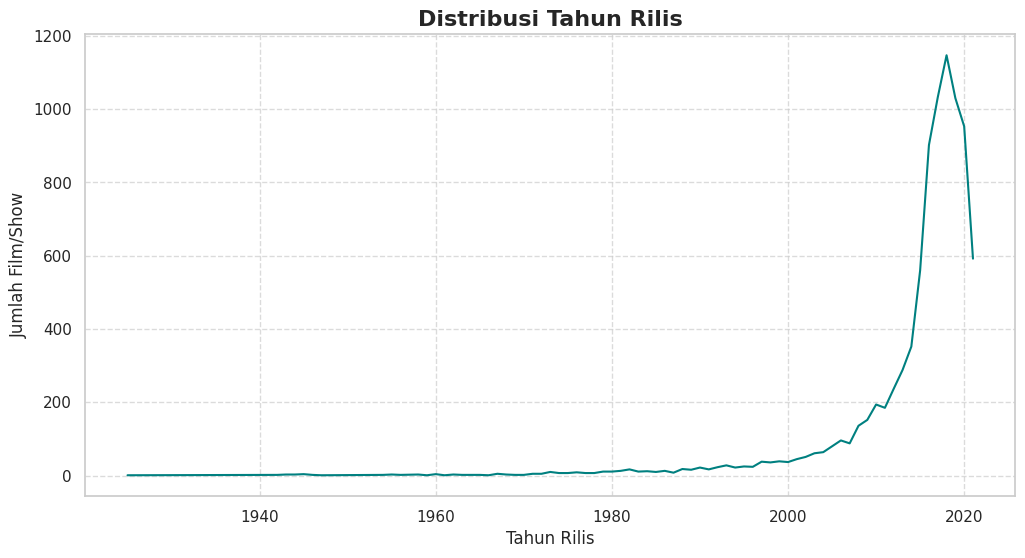

In [29]:
# 3. Distribusi Tahun Rilis
print("\n3. Distribusi Tahun Rilis")
release_year_counts = df["release_year"].value_counts().sort_index()
print(release_year_counts)

# Visualisasi Grafik Garis
plt.figure(figsize=(12, 6))
sns.lineplot(x=release_year_counts.index, y=release_year_counts.values, color="teal")
plt.title("Distribusi Tahun Rilis", fontsize=16, weight="bold")
plt.xlabel("Tahun Rilis", fontsize=12)
plt.ylabel("Jumlah Film/Show", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


4. Distribusi Rating
          Jumlah  Persentase (%)
rating                          
TV-MA       3207           36.43
TV-14       2160           24.54
TV-PG        863            9.80
R            799            9.08
PG-13        490            5.57
TV-Y7        334            3.79
TV-Y         307            3.49
PG           287            3.26
TV-G         220            2.50
NR            80            0.91
G             41            0.47
TV-Y7-FV       6            0.07
NC-17          3            0.03
UR             3            0.03
74 min         1            0.01
84 min         1            0.01
66 min         1            0.01


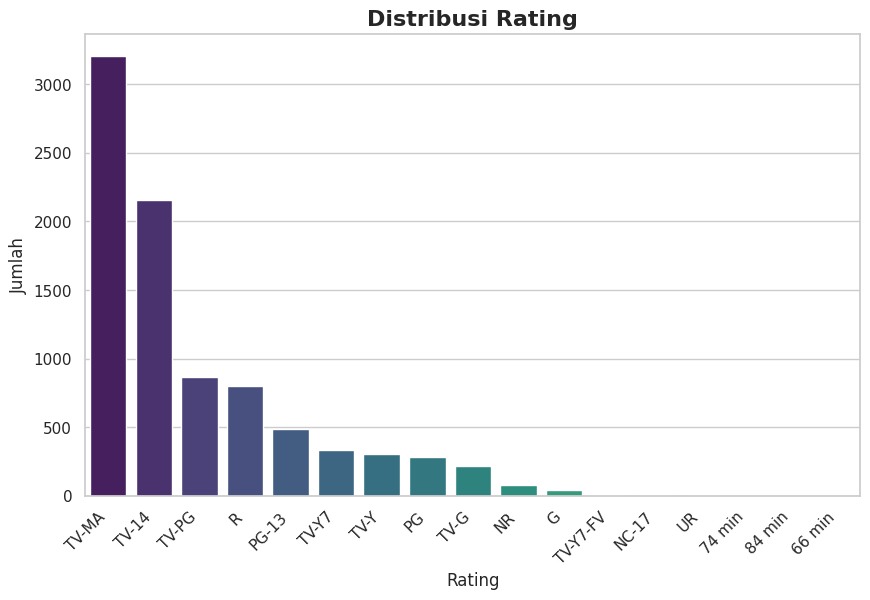

In [30]:
# 4. Distribusi Rating
print("\n4. Distribusi Rating")
rating_counts = df["rating"].value_counts()
rating_percent = (rating_counts / rating_counts.sum()) * 100
print(pd.DataFrame({"Jumlah": rating_counts, "Persentase (%)": rating_percent.round(2)}))

# Visualisasi Grafik Batang
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="viridis")
plt.title("Distribusi Rating", fontsize=16, weight="bold")
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Jumlah", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()


5. Perbandingan Film vs TV Show
         Jumlah  Persentase (%)
type                           
Movie      6131           69.62
TV Show    2676           30.38


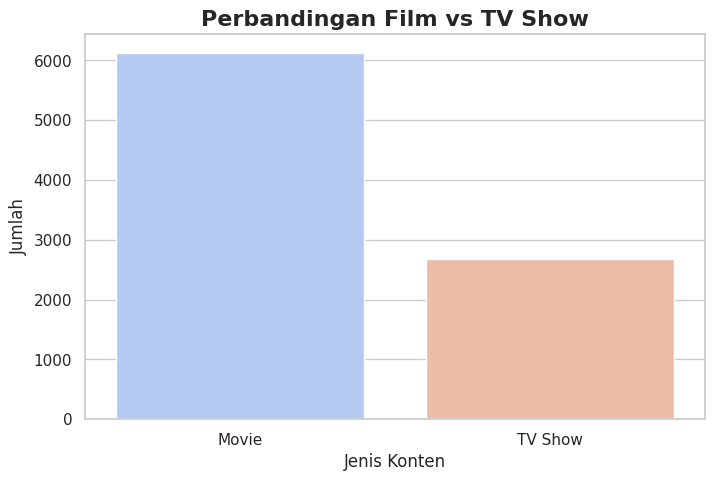

In [31]:
# 5. Perbandingan Film vs TV Show
print("\n5. Perbandingan Film vs TV Show")
type_counts = df["type"].value_counts()
type_percent = (type_counts / type_counts.sum()) * 100
print(pd.DataFrame({"Jumlah": type_counts, "Persentase (%)": type_percent.round(2)}))

# Visualisasi Grafik Batang
plt.figure(figsize=(8, 5))
sns.barplot(x=type_counts.index, y=type_counts.values, palette="coolwarm")
plt.title("Perbandingan Film vs TV Show", fontsize=16, weight="bold")
plt.xlabel("Jenis Konten", fontsize=12)
plt.ylabel("Jumlah", fontsize=12)
plt.show()


6. 10 Negara dengan Film/Show Terbanyak
country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64


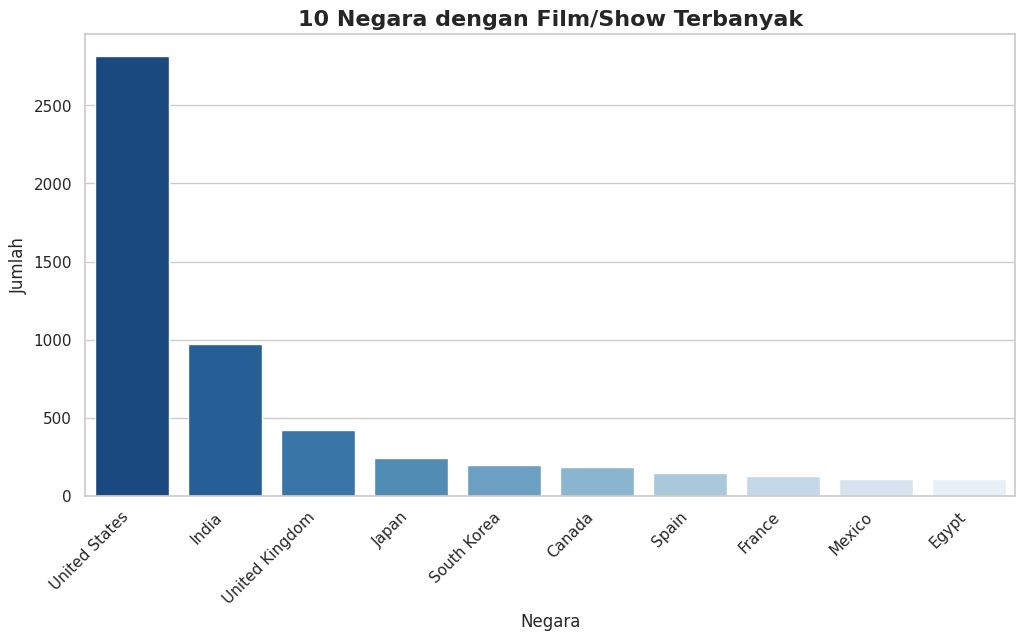

In [32]:
# 6. 10 Negara dengan Film/Show Terbanyak
print("\n6. 10 Negara dengan Film/Show Terbanyak")
country_counts = df["country"].value_counts().head(10)
print(country_counts)

# Visualisasi Grafik Batang
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, palette="Blues_r")
plt.title("10 Negara dengan Film/Show Terbanyak", fontsize=16, weight="bold")
plt.xlabel("Negara", fontsize=12)
plt.ylabel("Jumlah", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()


7. Jumlah Film/Show per Rating
type       Movie  TV Show
rating                   
66 min       1.0      NaN
74 min       1.0      NaN
84 min       1.0      NaN
G           41.0      NaN
NC-17        3.0      NaN
NR          75.0      5.0
PG         287.0      NaN
PG-13      490.0      NaN
R          797.0      2.0
TV-14     1427.0    733.0
TV-G       126.0     94.0
TV-MA     2062.0   1145.0
TV-PG      540.0    323.0
TV-Y       131.0    176.0
TV-Y7      139.0    195.0
TV-Y7-FV     5.0      1.0
UR           3.0      NaN


<Figure size 1400x700 with 0 Axes>

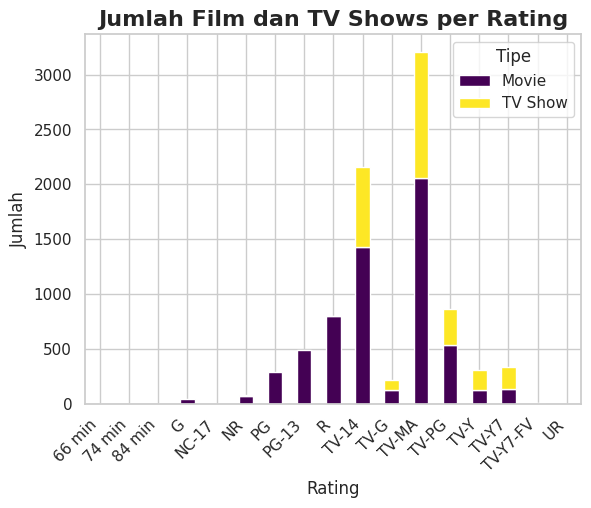

In [33]:
# 7. Jumlah Film/Show per Rating
print("\n7. Jumlah Film/Show per Rating")
rating_type_counts = df.groupby(["rating", "type"]).size().unstack()
print(rating_type_counts)

# Visualisasi Grafik Batang Bertumpuk
plt.figure(figsize=(14, 7))
rating_type_counts.plot(kind="bar", stacked=True, cmap="viridis")
plt.title("Jumlah Film dan TV Shows per Rating", fontsize=16, weight="bold")
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Jumlah", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Tipe", bbox_to_anchor=(1, 1))
plt.show()


9. Distribusi Film per Negara (Geoanalisis)
File ‘ne_110m_admin_0_countries.zip’ already there; not retrieving.

Archive:  ne_110m_admin_0_countries.zip


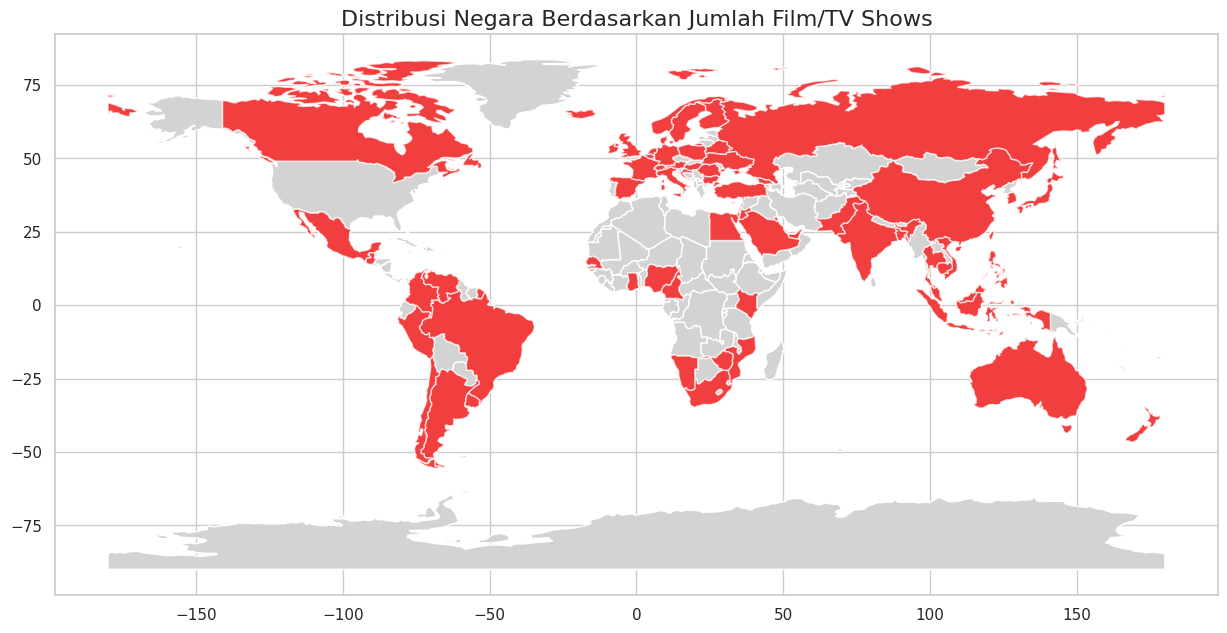

In [34]:
# 9. Distribusi Film per Negara (Geoanalisis)
print("\n9. Distribusi Film per Negara (Geoanalisis)")
def analisis_geoanalisis(df):
    # Download the shapefile if it doesn't exist
    !wget -nc https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip
    !unzip -n ne_110m_admin_0_countries.zip -d shapefiles

    # Update shapefile_path to point to the downloaded file
    shapefile_path = r'shapefiles/ne_110m_admin_0_countries.shp'
    world = gpd.read_file(shapefile_path)
    kolom_negara = 'NAME'


    jumlah_negara = df['country'].value_counts()
    df_geo_negara = pd.DataFrame(jumlah_negara).reset_index()
    df_geo_negara.columns = ['Negara', 'Jumlah']

    df_geo_negara['geometry'] = df_geo_negara['Negara'].apply(
        lambda x: world[world[kolom_negara] == x].geometry.values[0] if x in world[kolom_negara].values else None
    )

    gdf = gpd.GeoDataFrame(df_geo_negara, geometry='geometry')

    fig, ax = plt.subplots(figsize=(15, 10))
    world.plot(ax=ax, color='lightgrey')
    gdf.plot(ax=ax, marker='o', color='red', markersize=gdf['Jumlah']*10, alpha=0.7)
    ax.set_title('Distribusi Negara Berdasarkan Jumlah Film/TV Shows', fontsize=16)
    plt.show()

analisis_geoanalisis(df)


10. Analisis Klasterisasi (Data Mining)
                                                title rating  duration  \
0                                Dick Johnson Is Dead  PG-13      90.0   
6                    My Little Pony: A New Generation     PG      91.0   
7                                             Sankofa  TV-MA     125.0   
9                                        The Starling  PG-13     104.0   
12                                       Je Suis Karl  TV-MA     127.0   
13                   Confessions of an Invisible Girl  TV-PG      91.0   
16  Europe's Most Dangerous Man: Otto Skorzeny in ...  TV-MA      67.0   
18                                          Intrusion  TV-14      94.0   
22                                    Avvai Shanmughi  TV-PG     161.0   
23       Go! Go! Cory Carson: Chrissy Takes the Wheel   TV-Y      61.0   

    Cluster  
0         1  
6         1  
7         0  
9         1  
12        0  
13        1  
16        2  
18        1  
22        0  
23  

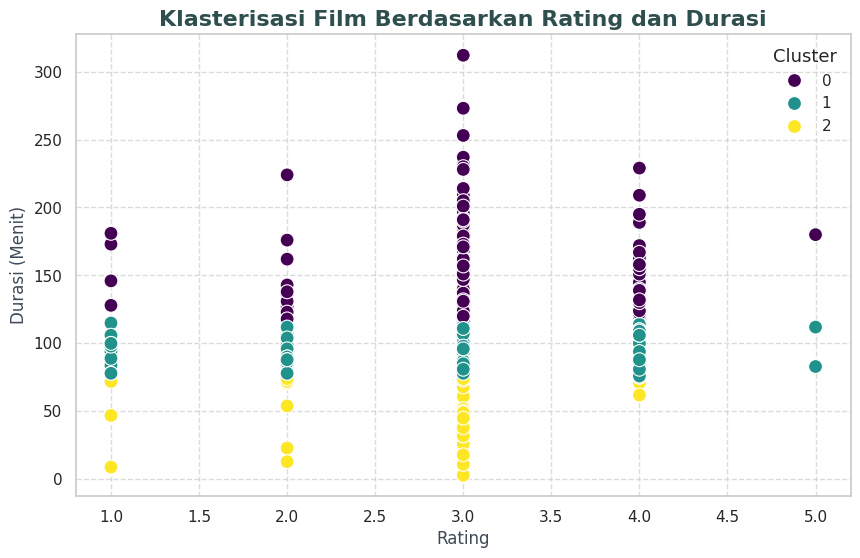

In [35]:
# 10. Analisis Klasterisasi (Data Mining)
print("\n10. Analisis Klasterisasi (Data Mining)")
def analisis_klasterisasi(df):
    df_movies = df[df['type'] == 'Movie'].dropna(subset=['duration', 'rating'])

    # Memetakan rating ke nilai numerik
    rating_map = {'G': 1, 'PG': 2, 'PG-13': 3, 'R': 4, 'NC-17': 5}
    df_movies['rating_num'] = df_movies['rating'].map(rating_map)

    # Konversi durasi ke angka
    df_movies['duration'] = df_movies['duration'].str.replace(' min', '', regex=True).astype(float)

    # Isi NaN dengan median masing-masing kolom
    df_movies['rating_num'].fillna(df_movies['rating_num'].median(), inplace=True)
    df_movies['duration'].fillna(df_movies['duration'].median(), inplace=True)

    # Fitur untuk klasterisasi
    fitur = df_movies[['rating_num', 'duration']].dropna().values

    # KMeans Clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    df_movies = df_movies.loc[df_movies[['rating_num', 'duration']].dropna().index]
    df_movies['Cluster'] = kmeans.fit_predict(fitur)

    # Menampilkan hasil klasterisasi
    print(df_movies[['title', 'rating', 'duration', 'Cluster']].head(10))

    # Plot hasil klasterisasi
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_movies, x='rating_num', y='duration', hue='Cluster', palette="viridis", s=100, edgecolor="w")
    plt.title('Klasterisasi Film Berdasarkan Rating dan Durasi', fontsize=16, weight='bold', color="#2f4f4f")
    plt.xlabel('Rating', fontsize=12, color="#3e4a59")
    plt.ylabel('Durasi (Menit)', fontsize=12, color="#3e4a59")
    plt.legend(title="Cluster", title_fontsize='13', loc='upper right', fontsize='11', frameon=False)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

analisis_klasterisasi(df)